In [494]:
# reference : https://github.com/ShoShohh/Principal-Component-Analysis/blob/main/with%20Python/List3-Fig3.ipynb
# reference : https://github.com/ShoShohh/PRML-with-Python/blob/main/graph2-8.ipynb
# reference : https://scikit-learn.org/stable/auto_examples/mixture/plot_gmm_pdf.html#sphx-glr-auto-examples-mixture-plot-gmm-pdf-py

In [495]:
import sklearn.datasets as datasets
import numpy as np
import matplotlib.pyplot as plt
# Mixture of Gaussians
from sklearn.mixture import GaussianMixture

In [496]:
# iris data set
iris = datasets.load_iris()
# Use two variables of iris data
X = iris.data[:, 1:3]

# Edit limits of a graph
x_lim = [np.min(X[:, 0]), np.max(X[:, 0])]
y_lim = [np.min(X[:, 1]), np.max(X[:, 1])]

# Calculate maximum likelihood estimator of Gaussian distribution
mu_pred = np.array([X[:, 0].mean(), X[:, 1].mean()])
Sigma_pred = [np.cov(np.array(X).T)]

Text(0.5, 1.0, 'Linear combination of two Gaussian distributions')

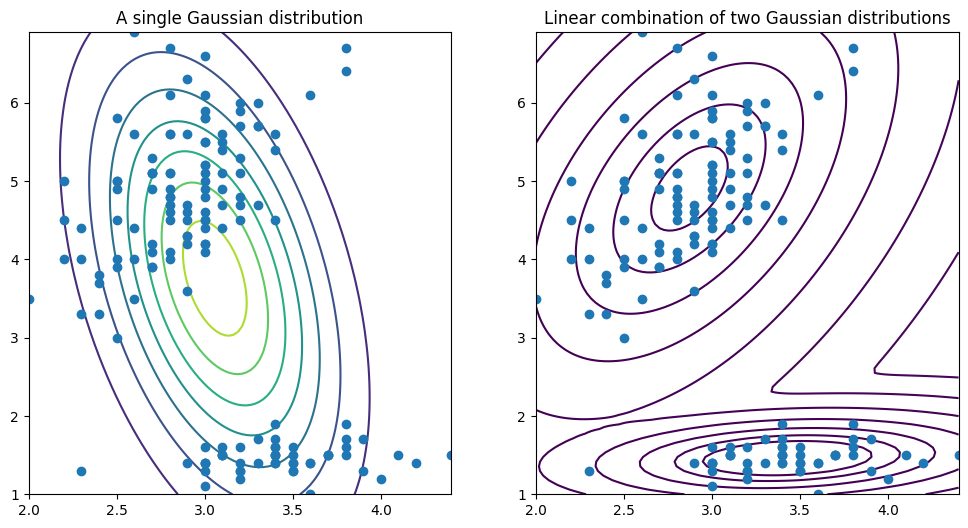

In [497]:
# See second reference for comments on contour lines
x_1 = np.linspace(x_lim[0], x_lim[1], 100)
x_2 = np.linspace(y_lim[0], y_lim[1], 100)
X_1, X_2 = np.meshgrid(x_1, x_2)

fig = plt.figure(figsize=(12, 6))

pos = np.dstack((X_1, X_2))
# Left : Contour fitted by maximum likelihood estimation under a single Gaussian distribution
left = plt.subplot(121)
for i in range(len(Sigma_pred)):
    Z = np.exp(-0.5 * np.einsum('ijk,kl,ijl->ij', pos - mu_pred, np.linalg.inv(Sigma_pred[i]), pos - mu_pred)) / (2 * np.pi * np.sqrt(np.linalg.det(Sigma_pred[i])))
    left.contour(X_1, X_2, Z)
    left.plot(X[:, 0], X[:, 1], 'o', label = r'$X_1$, $X_2$')
    left.set_title('A single Gaussian distribution')
    
# Right : Contour fitted by maximum likelihood estimation under linear combination of two Gaussian distributions
right = plt.subplot(122)
# fit a Gaussian Mixture Model with two components
gm = GaussianMixture(n_components=2, covariance_type="full")
gm.fit(X)
XX = np.array([X_1.ravel(), X_2.ravel()]).T
Z = -gm.score_samples(XX)
Z = Z.reshape(X_1.shape)
right.contour(X_1, X_2, Z, levels=np.logspace(0, 3, 15))
right.plot(X[:, 0], X[:, 1], 'o', label = r'$X_1$, $X_2$')
right.set_title('Linear combination of two Gaussian distributions')
